In [1]:
import numpy as np
from scipy.stats import gamma, erlang
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
geo_mean = 10 #145/24  # geometric mean of oiE lifespan
u = 21#205 /24# upper 95% CI
l = 7#103 /24# lower 95% CI

In [3]:
mu = geo_mean 
sigma = (u-l)/ (2*1.96)  # standard error of the geometric mean from confidence intervals (this assumes normal disribution thought...)

n = mu**2 / sigma**2
l_g = mu / sigma**2

In [4]:
print(n, l_g)

7.84 0.7839999999999999


In [5]:
m , v, s = gamma.stats(a=n, scale=1/l_g, moments='mvs')
print(m, v, s)

10.000000000000002 12.75510204081633 0.7142857142857143


In [6]:
gamma.interval(a=n, confidence=0.95,scale=1/l_g)


(4.272863221822316, 18.12015720529369)

In [89]:
# calculating the standard error from confidence intervals assuming normal disribution introduced a small error...
# now I estimate the shape and rate parameter numerically
def objective(nl: list, data: np.array = np.array([12, 7, 21])) -> float: #145/24, 103/24, 205/24
    n, l = nl
   # n = int(np.round(n))
   # m = erlang.stats(a=n, scale=1/l, moments='m')
    m = gamma.median(a=n, scale=1/l)
    low, high = gamma.interval(a=n, confidence=0.95,scale=1/l)
    esti_array = np.array([m, low, high])
    score_array = (data - esti_array)**2
    score = score_array.sum()
    return score

In [90]:
res = minimize(objective, [10, 0.5], method='Nelder-Mead')

In [91]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.32340757513741253
             x: [ 1.231e+01  9.633e-01]
           nit: 52
          nfev: 102
 final_simplex: (array([[ 1.231e+01,  9.633e-01],
                       [ 1.231e+01,  9.633e-01],
                       [ 1.231e+01,  9.633e-01]]), array([ 3.234e-01,  3.234e-01,  3.234e-01]))

In [92]:
n_best, l_best = res.x
print(res.x)

[12.31148539  0.96333725]


In [93]:
m , v, s = gamma.stats(a=int(np.round(n_best)), scale=1/l_best, moments='mvs')
print(m, v, s)

12.45669674456418 12.930774482169653 0.5773502691896258


In [94]:
gamma.interval(a=int(np.round(n_best)), confidence=0.95,scale=1/l_best)


(6.436556980937146, 20.43109875625294)

In [95]:
x = np.arange(0, 30, 0.1)
y = gamma.pdf(x, a=int(np.round(n_best)),scale=1/l_best)
y_sample = np.random.gamma(shape=n_best, scale=1/l_best, size=100)

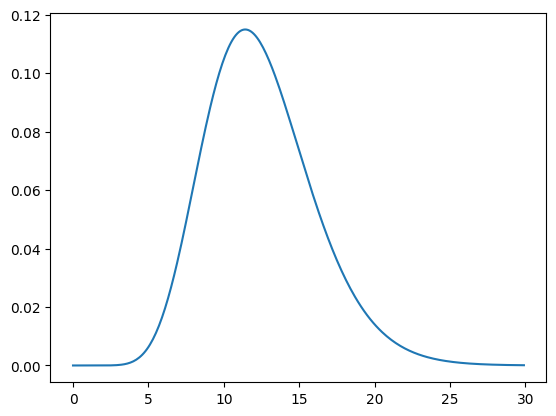

In [96]:
fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()

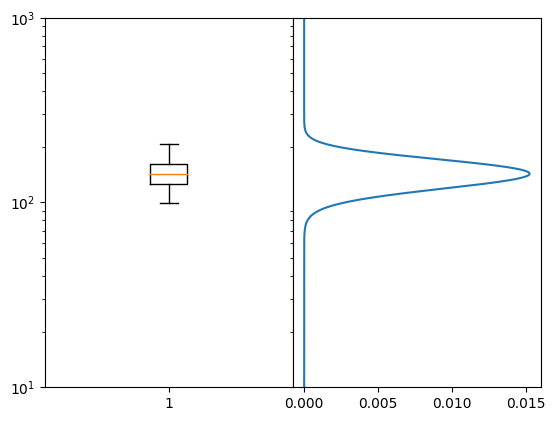

In [67]:
fig, ax = plt.subplots(1, 2)
ax[1].plot(y, x)
ax[1].set_yscale('log')
ax[1].set_ylim(10, 1000)
ax[1].set_yticks([])
ax[0].boxplot(y_sample)
ax[0].set_yscale('log')
ax[0].set_ylim(10, 1000)
plt.subplots_adjust(wspace=0)
plt.show()

In [39]:
erlang.ppf(0.99,  a=int(np.round(n_best)),scale=1/l_best)

216.49109864625376